Este Proyecto esta basado en el Libro: Aprende Machine Learning. Donde practicaremos lo aprendido a regresión lineal

Intentaremos predecir cuantas veces sera compartido en Redes Sociales un articulo de machine learning segun sus caracteristicas

In [18]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Análisis exploratorio

Cargamos la data y vemos las primeras 3 filas

In [19]:
data = pd.read_csv('articulos_ml.csv')
data.head(3)

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000


Observamos la cantidad de filas y columnas

In [20]:
data.shape

(161, 8)

Mostramos nuestras columnas, cantidad de datos no nulos y el tipo de dato de cada columna

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB


Realizamos un breve análisis estadístico

In [22]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Vemos la cantidad de datos únicos por columnas

In [23]:
data.nunique()

Title             161
url               121
Word count        157
# of Links         23
# of comments      24
# Images video     15
Elapsed days      133
# Shares          144
dtype: int64

Por último vemos la cantidad de datos nulos por columnas

In [24]:
data.isnull().sum()

Title              0
url               39
Word count         0
# of Links         0
# of comments     32
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64

Visualización general

Visualizamos las variables numéricas

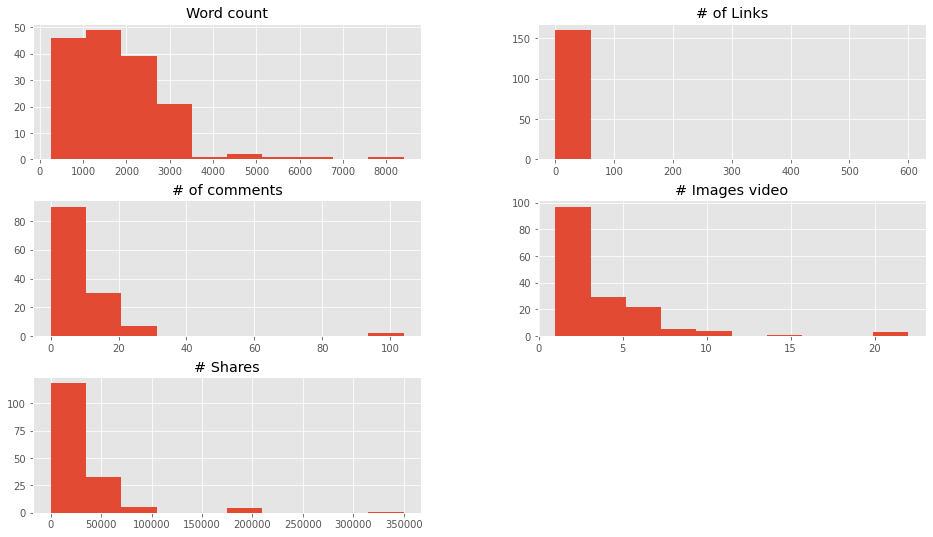

In [25]:
data.drop(['Title','url','Elapsed days'],1).hist() 
plt.show()

Como primer paso solo haremos una regresión lineal con una sola variable (cantidad de palabras)

Visualizamos la cantidad de palabras vs compartidos

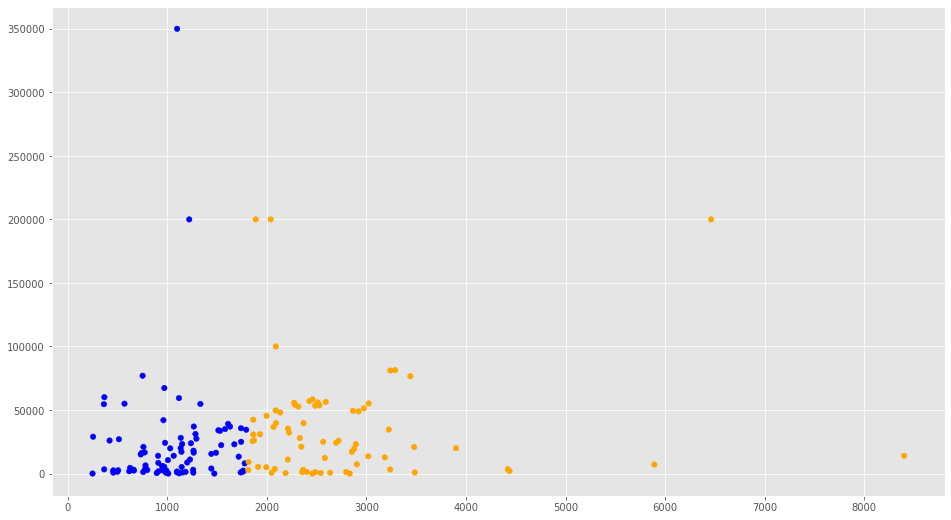

In [26]:
colores = ['orange','blue']
tamanios = [30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

#Pintamos en 2 colores los puntos bajo y sobre la media de cantidad de palabras
asignar = []
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1,f2,c=asignar,s=tamanios[0])
plt.show()

Filtraremos nuestra data para quitar los Outliers

In [27]:
#Recortamos la data en donde mayormente se concentran los puntos
#En el eje x es entre 0 y 3.500
#En el eje y es entre 0 y 80.000
filtered_data = data[(data['Word count']<= 3500)& (data['# Shares']<=80000)] 

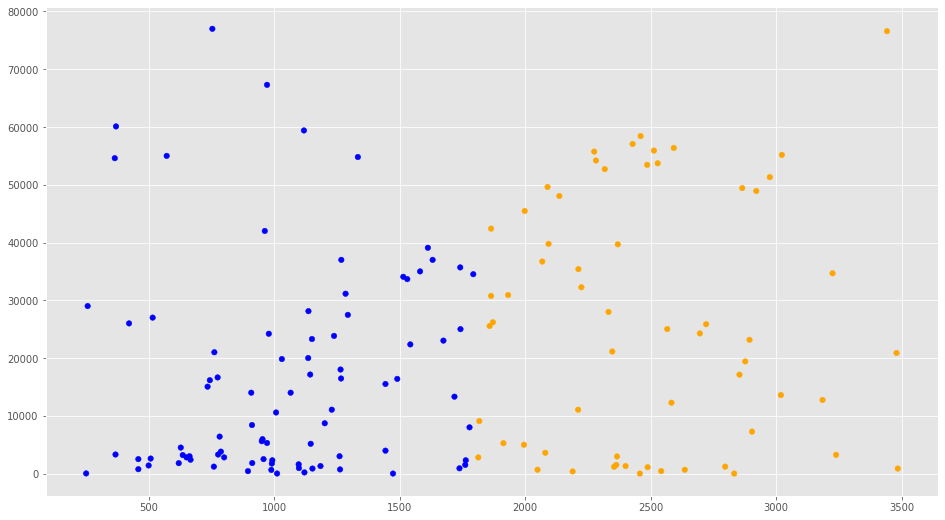

In [28]:
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

asignar = []
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1,f2,c=asignar,s=tamanios[0])
plt.show()

Vemos como quedan nuestros estadisticos luego de aplicar el filtro

In [29]:
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


Regresión Lineal Simple (1 Variable)

In [30]:
#Asignamos nuestra variable de entrada y de salida
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [31]:
#Creamos el objeto de regresion lineal
regr = linear_model.LinearRegression()

#Entrenamos nuestro modelo
regr.fit(X_train,y_train)

#Hacemos las predicciones
y_pred = regr.predict(X_train)

In [32]:
#Vemos el coeficiente obtenido, en nuestro caso la tangente
print('Coefficients \n',regr.coef_)
#El valor donde corta el eje y (x=0)
print('Independent term: \n', regr.intercept_)
#Error cuadratico medio
print('Mean squared error: %.2f'% mean_squared_error(y_train,y_pred))
#Puntaje de varianza. El mejor puntaje es 1.0
print('Variance score: %.2f'% r2_score(y_train,y_pred))

Coefficients 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


Visualizamos la recta que obtuvimos

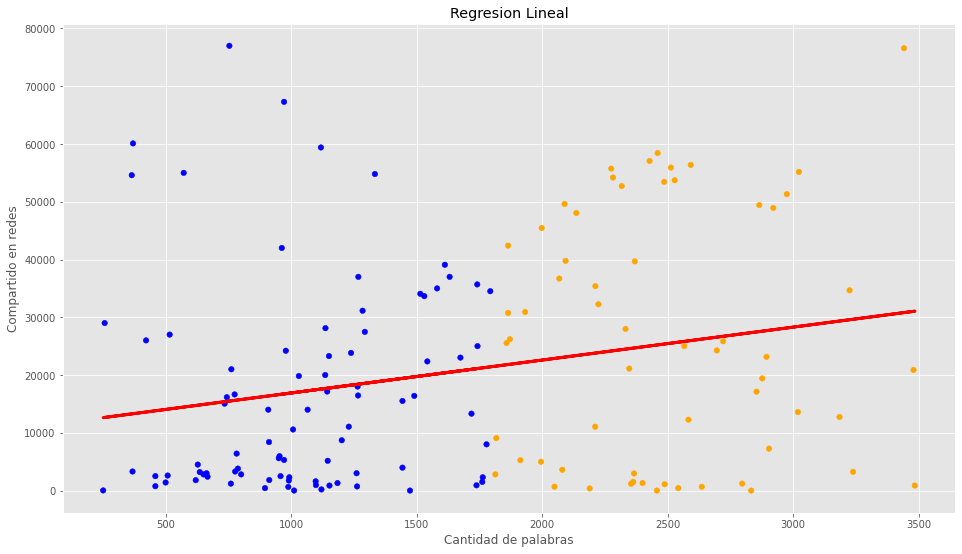

In [33]:
plt.scatter(X_train[:,0],y_train, c=asignar, s=tamanios[0])
plt.plot(X_train[:,0],y_pred, color='red',linewidth=3)

plt.xlabel("Cantidad de palabras")
plt.ylabel("Compartido en redes")
plt.title("Regresion Lineal")

plt.show()

Predicción 1: Prediciremos cuantos "Shares" obtendremos por un articulo de 2.000 palabras

In [44]:
#Según nuestro modelo:
y_dosmil = regr.predict([[2000]])
print(int(y_dosmil))

22595


Vemos que no es un resultado muy realista, por lo cual mejoraremos el modelo.

Regresion Lineal Multiple

In [45]:
suma = (filtered_data['# of Links']+filtered_data['# of comments'].fillna(0)+filtered_data['# Images video'])

In [46]:
dataX2 = pd.DataFrame()
dataX2['Worl count'] = filtered_data['Word count']
dataX2['Suma'] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [47]:
#Creamos el objeto de regresion lineal
regr2 = linear_model.LinearRegression()

#Entrenamos nuestro modelo
regr2.fit(XY_train,z_train)

#Hacemos las predicciones
z_pred = regr2.predict(XY_train)

In [48]:
#Los coeficientes
print('Coefficients \n',regr2.coef_)
#Error cuadratico medio
print('Mean squared error: %.2f'% mean_squared_error(z_train,z_pred))
#Puntaje de varianza. El mejor puntaje es 1.0
print('Variance score: %.2f'% r2_score(z_train,z_pred))

Coefficients 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


Ahora visualizamos en un plano

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

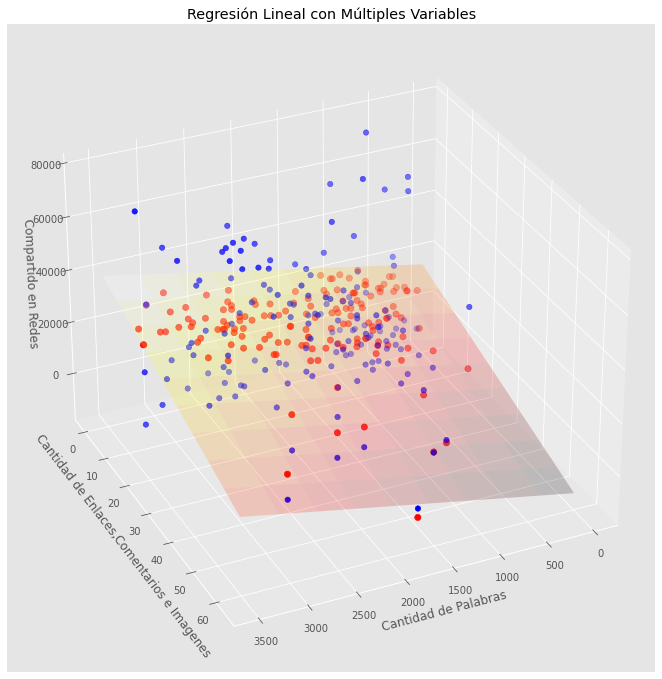

In [49]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')


Prediccion 2: Prediciremos cuantos Shares voy a obtener por un articulo de 2000 palabras, 10 enlaces, 4 comentarios, 6 imagenes.

In [50]:
z_Dosmil = regr2.predict([[2000,10+4+6]])
print(int(z_Dosmil))

20518


Comparemos nuestras predicciones

In [51]:
# Restamos los errores calculados antes: "menos error" es mejor
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)

20765911.860715985


In [52]:
# También calculamos la mejora en la varianza:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejoraEnVarianza)
# Aunque no parezca mucho, recordemos que el valor más alto que se puede obtener es 1.0

0.052615337462582956


In [53]:
# Mejoramos en nuestra predicción de un artículo de 2.000 palabras, aunque disminuyen los "Shares" que obtendremos en el 2do modelo, seguramente será un valor más cercano a la realidad
diferenciaComparir = z_Dosmil - y_dosmil
print(int(diferenciaComparir))

-2077


Reflexión: Si quisieramos mejorar el modelo deberiamos utilizar mas de 2 variables y conseguir  mejores variables de entrada. 